In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My Drive/PGM Data

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data


In [3]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [4]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [5]:
cuda.close()
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [ ]:
ls

 chubby_results/                         'Midway Report Figures'/
'Copy of image-2-video-baseline.ipynb'    muscular_results/
 deforum-baseline.ipynb                   SD1-sliders-inference.ipynb
 deforum-video-baseline/                  selfie_and_video.csv
 experiments/                             sliders/
 files/                                   surprised_sd14.pt
 image-2-video-baseline-files/            Untitled0.ipynb
 image-2-video-baseline.ipynb             Untitled1.ipynb
 image-2-video-latent-experiments.ipynb


In [ ]:
ls

 chubby_results/                         'Midway Report Figures'/
'Copy of image-2-video-baseline.ipynb'    muscular_results/
 deforum-baseline.ipynb                   SD1-sliders-inference.ipynb
 deforum-video-baseline/                  selfie_and_video.csv
 experiments/                             sliders/
 files/                                  'Sliders Inference (1).ipynb'
 image-2-video-baseline-files/            surprised_sd14.pt
 image-2-video-baseline.ipynb             Untitled0.ipynb
 image-2-video-latent-experiments.ipynb   Untitled1.ipynb


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('selfie_and_video.csv')
df_vid = df[df['type'] == 'video']

In [ ]:
print(len(df_vid))

40


In [ ]:
torch.cuda.empty_cache()

In [ ]:
import os

cwd = os.getcwd()
print(f'{cwd}/files/1/4.mp4')


import cv2
import numpy as np

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(f'{cwd}/files/1/4.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")

frames = []
# Read until video is completed
while(cap.isOpened()):

# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        #cv2_imshow(frame)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/files/1/4.mp4


In [ ]:
import os

cwd = os.getcwd()

In [ ]:
print(len(frames))

86


In [ ]:
import os
os.mkdir(f'{cwd}/experiments/1_4_original_frames')

FileExistsError: [Errno 17] File exists: '/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/experiments/1_4_original_frames'

In [ ]:
from PIL import Image

# for i, arr in enumerate(frames):
#   im = Image.fromarray(arr)
#   im.save(f'{cwd}/experiments/1_4_original_frames/{i}.jpg')

In [ ]:
!git  clone https://github.com/rohitgandikota/sliders.git
!cd sliders
!pip install -r sliders/requirements.txt
!pip install accelerate
import os
os.chdir('sliders')
!wget https://sliders.baulab.info/weights/sd14_sliders/chubby_sd14.pt
!wget https://sliders.baulab.info/weights/sd14_sliders/smiling_sd14.pt

fatal: destination path 'sliders' already exists and is not an empty directory.
--2024-04-25 14:49:29--  https://sliders.baulab.info/weights/sd14_sliders/chubby_sd14.pt
Resolving sliders.baulab.info (sliders.baulab.info)... 35.232.255.106
Connecting to sliders.baulab.info (sliders.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6025989 (5.7M)
Saving to: ‘chubby_sd14.pt.6’

chubby_sd14.pt.6    100%[===================>]   5.75M  3.28MB/s    in 1.7s    

2024-04-25 14:49:32 (3.28 MB/s) - ‘chubby_sd14.pt.6’ saved [6025989/6025989]

--2024-04-25 14:49:32--  https://sliders.baulab.info/weights/sd14_sliders/smiling_sd14.pt
Resolving sliders.baulab.info (sliders.baulab.info)... 35.232.255.106
Connecting to sliders.baulab.info (sliders.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6026893 (5.7M)
Saving to: ‘smiling_sd14.pt.2’

smiling_sd14.pt.2   100%[===================>]   5.75M  3.3

In [ ]:
ls

 chubby_results/                         'Midway Report Figures'/
'Copy of image-2-video-baseline.ipynb'    muscular_results/
 deforum-baseline.ipynb                   SD1-sliders-inference.ipynb
 deforum-video-baseline/                  selfie_and_video.csv
 experiments/                             sliders/
 files/                                  'Sliders Inference (1).ipynb'
 image-2-video-baseline-files/            surprised_sd14.pt
 image-2-video-baseline.ipynb             Untitled0.ipynb
 image-2-video-latent-experiments.ipynb   Untitled1.ipynb


In [ ]:
ls '../drive/MyDrive/PGM Data/sliders'

ls: cannot access '../drive/MyDrive/PGM Data/sliders': No such file or directory


In [ ]:
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
  Using cached nv

In [ ]:
import torch
from PIL import Image
import argparse
import os, json, random
import pandas as pd
import matplotlib.pyplot as plt
import glob, re
import random


from safetensors.torch import load_file
import matplotlib.image as mpimg
import copy
import gc
from transformers import CLIPTextModel, CLIPTokenizer

import diffusers
from diffusers import DiffusionPipeline
from diffusers import AutoencoderKL, DDPMScheduler, DiffusionPipeline, UNet2DConditionModel, LMSDiscreteScheduler
from diffusers.loaders import AttnProcsLayers
from diffusers.models.attention_processor import LoRAAttnProcessor, AttentionProcessor
from diffusers.pipelines import StableDiffusionXLPipeline


from typing import Optional, Union, Tuple, List, Callable, Dict
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch.nn.functional as nnf
import numpy as np
import abc
import shutil
from torch.optim.adam import Adam

try:
    os.chdir('sliders')
except:
    pass

import trainscripts.textsliders.ptp_utils as ptp_utils
from trainscripts.textsliders.lora import LoRANetwork, DEFAULT_TARGET_REPLACE, UNET_TARGET_REPLACE_MODULE_CONV

In [ ]:
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
LOW_RESOURCE = False
NUM_DDIM_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
weight_dtype = torch.float32 # if you are using GPU >T4 in colab you can use bfloat16
device = 'cuda'
device = torch.device(device)
ldm_stable = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", scheduler=scheduler, torch_dtype=weight_dtype).to(device)
try:
    ldm_stable.disable_xformers_memory_efficient_attention()
except AttributeError:
    print("Attribute disable_xformers_memory_efficient_attention() is missing")
tokenizer = ldm_stable.tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:128: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.20.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future 

In [ ]:
ls ..

 chubby_results/                         'Midway Report Figures'/
'Copy of image-2-video-baseline.ipynb'    muscular_results/
 deforum-baseline.ipynb                   SD1-sliders-inference.ipynb
 deforum-video-baseline/                  selfie_and_video.csv
 experiments/                             sliders/
 files/                                  'Sliders Inference (1).ipynb'
 image-2-video-baseline-files/            surprised_sd14.pt
 image-2-video-baseline.ipynb             Untitled0.ipynb
 image-2-video-latent-experiments.ipynb   Untitled1.ipynb


In [ ]:
cd '../drive/MyDrive/PGM Data/chubby_results'

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/chubby_results


In [ ]:
cd ../chubby_results/

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/chubby_results


In [ ]:
ls

chubby_latent_finals.pt          chubby_zero_text_embeddings.pt  man_chubby_3.png
chubby_man_standing_0.png        latent_finals_man_standing.pt   scale_factor_finals.pt
chubby_man_standing_2.png        latent_x_primes.pt              ucond_embeddings_chubby_man_0.pt
chubby_man_standing_4.png        man_chubby_0.png                ucond_embeddings_chubby_man_8.pt
chubby_man_standing_8.png        man_chubby_1.png                x_t_chubby_man_0.pt
chubby_three_text_embeddings.pt  man_chubby_2.png                x_t_chubby_man_8.pt


In [ ]:
with torch.no_grad():
  latent_finals = torch.load('latent_finals_man_standing.pt')
  #intensity_final_latent = latent_finals[-1].float()
  #print(intensity_final_latent.shape)
  intensity_zero_latent = latent_finals[0].float()


In [ ]:
def load_512(image_path, left=0, right=0, top=0, bottom=0):
    if type(image_path) is str:
        image = np.array(Image.open(image_path))[:, :, :3]
    else:
        image = image_path
    h, w, c = image.shape
    left = min(left, w-1)
    right = min(right, w - left - 1)
    top = min(top, h - left - 1)
    bottom = min(bottom, h - top - 1)
    image = image[top:h-bottom, left:w-right]
    h, w, c = image.shape
    if h < w:
        offset = (w - h) // 2
        image = image[:, offset:offset + h]
    elif w < h:
        offset = (h - w) // 2
        image = image[offset:offset + w]
    image = np.array(Image.fromarray(image).resize((512, 512)))
    return image


class NullInversion:

    def prev_step(self, model_output: Union[torch.FloatTensor, np.ndarray], timestep: int, sample: Union[torch.FloatTensor, np.ndarray]):
        prev_timestep = timestep - self.scheduler.config.num_train_timesteps // self.scheduler.num_inference_steps
        alpha_prod_t = self.scheduler.alphas_cumprod[timestep]
        alpha_prod_t_prev = self.scheduler.alphas_cumprod[prev_timestep] if prev_timestep >= 0 else self.scheduler.final_alpha_cumprod
        beta_prod_t = 1 - alpha_prod_t
        pred_original_sample = (sample - beta_prod_t ** 0.5 * model_output) / alpha_prod_t ** 0.5
        pred_sample_direction = (1 - alpha_prod_t_prev) ** 0.5 * model_output
        prev_sample = alpha_prod_t_prev ** 0.5 * pred_original_sample + pred_sample_direction
        return prev_sample

    def next_step(self, model_output: Union[torch.FloatTensor, np.ndarray], timestep: int, sample: Union[torch.FloatTensor, np.ndarray]):
        timestep, next_timestep = min(timestep - self.scheduler.config.num_train_timesteps // self.scheduler.num_inference_steps, 999), timestep
        alpha_prod_t = self.scheduler.alphas_cumprod[timestep] if timestep >= 0 else self.scheduler.final_alpha_cumprod
        alpha_prod_t_next = self.scheduler.alphas_cumprod[next_timestep]
        beta_prod_t = 1 - alpha_prod_t
        next_original_sample = (sample - beta_prod_t ** 0.5 * model_output) / alpha_prod_t ** 0.5
        next_sample_direction = (1 - alpha_prod_t_next) ** 0.5 * model_output
        next_sample = alpha_prod_t_next ** 0.5 * next_original_sample + next_sample_direction
        return next_sample

    def get_noise_pred_single(self, latents, t, context):
        noise_pred = self.model.unet(latents, t, encoder_hidden_states=context)["sample"]
        return noise_pred

    def get_noise_pred(self, latents, t, is_forward=True, context=None):
        latents_input = torch.cat([latents] * 2)
        latents_input = latents_input.to(self.model.unet.dtype)
        if context is None:
            context = self.context
        guidance_scale = 1 if is_forward else GUIDANCE_SCALE
        noise_pred = self.model.unet(latents_input, t, encoder_hidden_states=context)["sample"]
        noise_pred_uncond, noise_prediction_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_prediction_text - noise_pred_uncond)
        if is_forward:
            latents = self.next_step(noise_pred, t, latents)
        else:
            latents = self.prev_step(noise_pred, t, latents)
        return latents

    @torch.no_grad()
    def latent2image(self, latents, return_type='np'):
        latents = 1 / 0.18215 * latents.detach()
        latents = latents.to(self.model.vae.dtype)
        image = self.model.vae.decode(latents)['sample']
        if return_type == 'np':
            image = (image / 2 + 0.5).clamp(0, 1)
            image = image.cpu().permute(0, 2, 3, 1).to(torch.float16).numpy()[0]
            image = (image * 255).astype(np.uint8)
        return image

    @torch.no_grad()
    def image2latent(self, image):
        with torch.no_grad():
            if type(image) is Image:
                image = np.array(image)
            if type(image) is torch.Tensor and image.dim() == 4:
                latents = image
            else:
                image = torch.from_numpy(image).float() / 127.5 - 1
                image = image.permute(2, 0, 1).unsqueeze(0).to(device).to(self.model.vae.dtype)
                latents = self.model.vae.encode(image)['latent_dist'].mean
                latents = latents * 0.18215
        return latents

    @torch.no_grad()
    def init_prompt(self, prompt: str):
        uncond_input = self.model.tokenizer(
            [""], padding="max_length", max_length=self.model.tokenizer.model_max_length,
            return_tensors="pt"
        )
        uncond_embeddings = self.model.text_encoder(uncond_input.input_ids.to(self.model.device))[0]
        text_input = self.model.tokenizer(
            [prompt],
            padding="max_length",
            max_length=self.model.tokenizer.model_max_length,
            truncation=True,
            return_tensors="pt",
        )
        text_embeddings = self.model.text_encoder(text_input.input_ids.to(self.model.device))[0]
        self.context = torch.cat([uncond_embeddings, text_embeddings])
        self.prompt = prompt

    @torch.no_grad()
    def ddim_loop(self, latent):
        uncond_embeddings, cond_embeddings = self.context.chunk(2)
        all_latent = [latent]
        latent = latent.clone().detach()
        latent = latent.to(self.model.unet.dtype)
        for i in range(NUM_DDIM_STEPS):
            t = self.model.scheduler.timesteps[len(self.model.scheduler.timesteps) - i - 1]
            noise_pred = self.get_noise_pred_single(latent, t, cond_embeddings)
            latent = self.next_step(noise_pred, t, latent)
            all_latent.append(latent)
        return all_latent

    @property
    def scheduler(self):
        return self.model.scheduler

    @torch.no_grad()
    def ddim_inversion(self, image):
        # latent = self.image2latent(image)
        with torch.no_grad():
          latent = intensity_zero_latent
        image_rec = self.latent2image(latent)
        ddim_latents = self.ddim_loop(latent)

        return image_rec, ddim_latents

    def null_optimization(self, latents, num_inner_steps, epsilon):
        uncond_embeddings, cond_embeddings = self.context.chunk(2)
        uncond_embeddings_list = []
        latent_cur = latents[-1]
        bar = tqdm(total=num_inner_steps * NUM_DDIM_STEPS)
        for i in range(NUM_DDIM_STEPS):
            uncond_embeddings = uncond_embeddings.clone().detach()
            uncond_embeddings.requires_grad = True
            optimizer = Adam([uncond_embeddings], lr=1e-2 * (1. - i / 100.))
            latent_prev = latents[len(latents) - i - 2]
            t = self.model.scheduler.timesteps[i]
            with torch.no_grad():
                noise_pred_cond = self.get_noise_pred_single(latent_cur, t, cond_embeddings)
            for j in range(num_inner_steps):
                noise_pred_uncond = self.get_noise_pred_single(latent_cur, t, uncond_embeddings)
                noise_pred = noise_pred_uncond + GUIDANCE_SCALE * (noise_pred_cond - noise_pred_uncond)
                latents_prev_rec = self.prev_step(noise_pred, t, latent_cur)
                loss = nnf.mse_loss(latents_prev_rec, latent_prev)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                loss_item = loss.item()
                bar.update()
                if loss_item < epsilon + i * 2e-5:
                    break
            for j in range(j + 1, num_inner_steps):
                bar.update()
            uncond_embeddings_list.append(uncond_embeddings[:1].detach())
            with torch.no_grad():
                context = torch.cat([uncond_embeddings, cond_embeddings])
                latent_cur = self.get_noise_pred(latent_cur, t, False, context)
        bar.close()
        return uncond_embeddings_list

    def invert(self, image_path: str, prompt: str, offsets=(0,0,0,0), num_inner_steps=10, early_stop_epsilon=1e-5, verbose=False):
        self.init_prompt(prompt)
        ptp_utils.register_attention_control(self.model, None)

        image_gt = load_512(image_path, *offsets)
        display(Image.fromarray(image_gt))

        if verbose:
            print("DDIM inversion...")
        image_rec, ddim_latents = self.ddim_inversion(image_gt)
        if verbose:
            print("Null-text optimization...")
        uncond_embeddings = self.null_optimization(ddim_latents, num_inner_steps, early_stop_epsilon)
        return (image_gt, image_rec), ddim_latents[-1], uncond_embeddings


    def __init__(self, model):
        scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                                  set_alpha_to_one=False)
        self.model = model
        self.tokenizer = self.model.tokenizer
        self.model.scheduler.set_timesteps(NUM_DDIM_STEPS)
        self.prompt = None
        self.context = None

null_inversion = NullInversion(ldm_stable)

In [ ]:
ls

chubby_latent_finals.pt  man_chubby_1.png  man_chubby_3.png
man_chubby_0.png         man_chubby_2.png  scale_factor_finals.pt


In [ ]:
cd 'muscular_results'

'/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/sliders'

In [ ]:
def flush():
    torch.cuda.empty_cache()
    gc.collect()
flush()

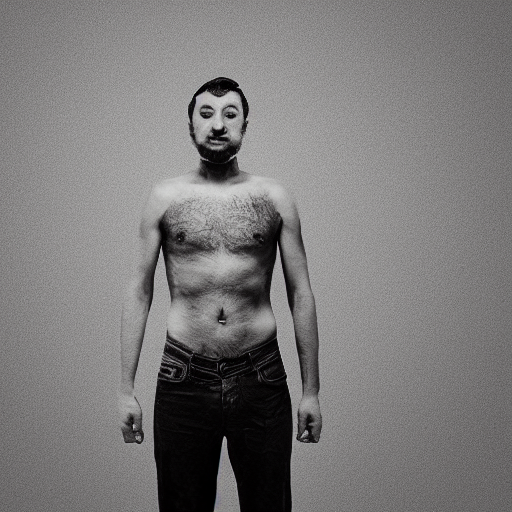

DDIM inversion...
Null-text optimization...


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
images_tuples = []
x_ts = []
uncond_embeddings_list = []

for i in range(1):
  image_path = f'chubby_man_standing_0.png'
  prompt = "image of a man standing"
  (image_gt, image_enc), x_t, uncond_embeddings = null_inversion.invert(image_path, prompt, offsets=(0,0,0,0), verbose=True)
  images_tuples.append((image_gt, image_enc))
  x_ts.append(x_t)
  uncond_embeddings_list.append(uncond_embeddings)

In [ ]:
torch.save(uncond_embeddings_list[0], 'ucond_embeddings_chubby_man_0.pt')
torch.save(x_ts[0], 'x_t_chubby_man_0.pt')

In [ ]:
print(uncond_embeddings_list[0][0].shape)

torch.Size([1, 77, 768])


In [ ]:
ls

chubby_latent_finals.pt  man_chubby_1.png  man_chubby_3.png
man_chubby_0.png         man_chubby_2.png  scale_factor_finals.pt


In [ ]:
torch.save(uncond_embeddings, 'chubby_zero_text_embeddings.pt')

In [ ]:
import copy
uncond_embeddings_copy_list  = []

for uncond_embeddings in uncond_embeddings_list:
  uncond_embeddings_copy = copy.deepcopy(uncond_embeddings)
  uncond_embeddings_copy_list.append(uncond_embeddings_copy)

In [ ]:
def flush():
    torch.cuda.empty_cache()
    gc.collect()
flush()
width = 512
height = 512
steps = 50
cfg_scale = 7.5

del ldm_stable
flush()

In [ ]:
pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"

revision = None
device = 'cuda'
rank = 4


# Load scheduler, tokenizer and models.
noise_scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path, subfolder="tokenizer", revision=revision
)
text_encoder = CLIPTextModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="text_encoder", revision=revision
)
vae = AutoencoderKL.from_pretrained(pretrained_model_name_or_path, subfolder="vae", revision=revision)
unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="unet", revision=revision
)
# freeze parameters of models to save more memory
unet.requires_grad_(False)
unet.to(device, dtype=weight_dtype)
vae.requires_grad_(False)

text_encoder.requires_grad_(False)

# For mixed precision training we cast all non-trainable weigths (vae, non-lora text_encoder and non-lora unet) to half-precision
# as these weights are only used for inference, keeping weights in full precision is not required.


# Move unet, vae and text_encoder to device and cast to weight_dtype
vae.requires_grad_(False)
vae.to(device, dtype=weight_dtype)
text_encoder.to(device, dtype=weight_dtype)

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

In [ ]:
!wget https://sliders.baulab.info/weights/sd14_sliders/surprised_sd14.pt

--2024-03-22 14:41:49--  https://sliders.baulab.info/weights/sd14_sliders/surprised_sd14.pt
Resolving sliders.baulab.info (sliders.baulab.info)... 35.232.255.106
Connecting to sliders.baulab.info (sliders.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027797 (5.7M)
Saving to: ‘surprised_sd14.pt.13’

surprised_sd14.pt.1 100%[===================>]   5.75M  3.46MB/s    in 1.7s    

2024-03-22 14:41:51 (3.46 MB/s) - ‘surprised_sd14.pt.13’ saved [6027797/6027797]



In [ ]:

slider1 = 'surprised_sd14.pt'

train_method = 'noxattn'
network_type = "c3lier"
if train_method == 'xattn':
    network_type = 'lierla'

modules = DEFAULT_TARGET_REPLACE
if network_type == "c3lier":
    modules += UNET_TARGET_REPLACE_MODULE_CONV
import os
model_name = slider1

name = os.path.basename(model_name)
alpha = 1.0
# freeze parameters of models to save more memory
unet.requires_grad_(False)
unet.to(device, dtype=weight_dtype)
network1 = LoRANetwork(
        unet,
        rank=4,
        multiplier=1.0,
        alpha=alpha,
        train_method=train_method,
    ).to(device, dtype=weight_dtype)
network1.load_state_dict(torch.load(slider1))

torch_device = device
negative_prompt = None
batch_size = 1
height = 512
width = 512
ddim_steps = 50
guidance_scale = 7.5

create LoRA for U-Net: 150 modules.


In [ ]:
scale1 = 2
start_noise = 500 # use smaller values for real image editing so that the identity does not change

images_list = []


for i in range(len(uncond_embeddings_copy_list)):
  x_t = x_ts[i]
  uncond_embeddings_copy = uncond_embeddings_copy_list[i]

  text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

  text_embeddings_ = text_encoder(text_input.input_ids.to(torch_device))[0]

  max_length = text_input.input_ids.shape[-1]

  noise_scheduler.set_timesteps(ddim_steps)


  latents = x_t* noise_scheduler.init_noise_sigma
  latents = latents.to(unet.dtype)
  cnt = -1
  for t in tqdm(noise_scheduler.timesteps):
      cnt+=1
      if t>start_noise:
          network1.set_lora_slider(scale=0)
      else:
          network1.set_lora_slider(scale=scale1)

      text_embeddings = torch.cat([uncond_embeddings_copy[cnt].expand(*text_embeddings_.shape), text_embeddings_])
      # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
      latent_model_input = torch.cat([latents] * 2)
      text_embeddings = text_embeddings.to(weight_dtype)
      latent_model_input = noise_scheduler.scale_model_input(latent_model_input, timestep=t)
      # predict the noise residual

      with torch.no_grad():
          with network1:
              noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
      # perform guidance
      noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
      noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

      # compute the previous noisy sample x_t -> x_t-1
      latents = noise_scheduler.step(noise_pred, t, latents).prev_sample

  # scale and decode the image latents with vae
  latents = 1 / 0.18215 * latents
  with torch.no_grad():
      image = vae.decode(latents).sample
  image = (image / 2 + 0.5).clamp(0, 1)
  image = image.detach().cpu().permute(0, 2, 3, 1).to(torch.float16).numpy()
  images = (image * 255).round().astype("uint8")
  pil_images = [Image.fromarray(image) for image in images]
  images_list.append(pil_images[0])


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
#os.mkdir(f'{cwd}/experiments/1_4_generated_frames')

for i, im in enumerate(images_list):
  im.save(f'{cwd}/experiments/1_4_generated_frames/{i}.jpg')

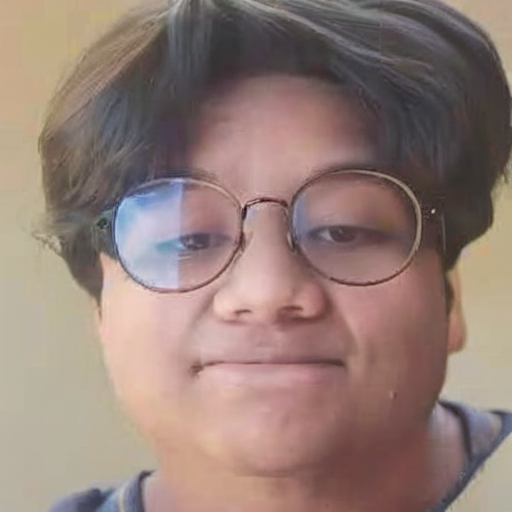

In [ ]:
images_list[2]